In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
DataFrame = pd.read_csv("iris.csv")
DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [339]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [340]:
DataFrame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [341]:
DataFrame.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
87,6.3,2.3,4.4,1.3,1
113,5.7,2.5,5.0,2.0,2
138,6.0,3.0,4.8,1.8,2
64,5.6,2.9,3.6,1.3,1
129,7.2,3.0,5.8,1.6,2
19,5.1,3.8,1.5,0.3,0
17,5.1,3.5,1.4,0.3,0
149,5.9,3.0,5.1,1.8,2
65,6.7,3.1,4.4,1.4,1
142,5.8,2.7,5.1,1.9,2


In [342]:
df_isnull = DataFrame.isnull().sum()
df_isnull[df_isnull>0]

Series([], dtype: int64)

In [343]:
DataFrame.duplicated().sum()

np.int64(1)

In [344]:
DataFrame = DataFrame.drop_duplicates()

In [345]:
DataFrame.duplicated().sum()

np.int64(0)

In [346]:
Numeric_featurs = DataFrame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

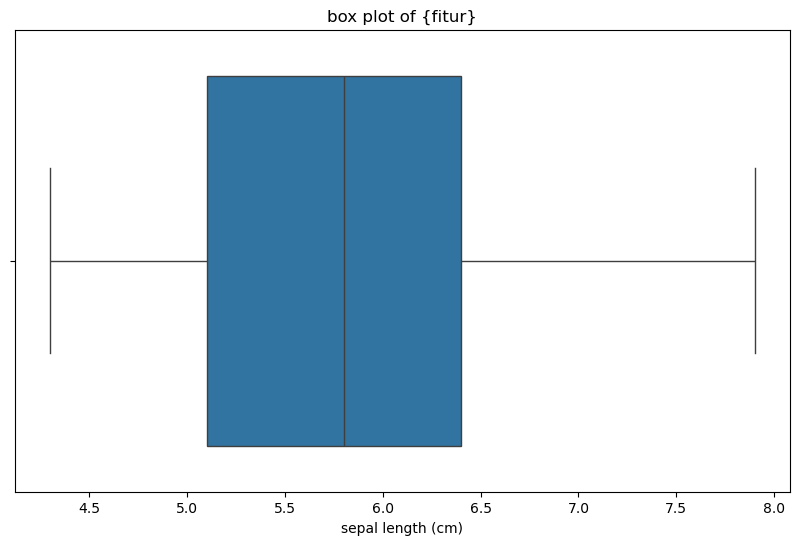

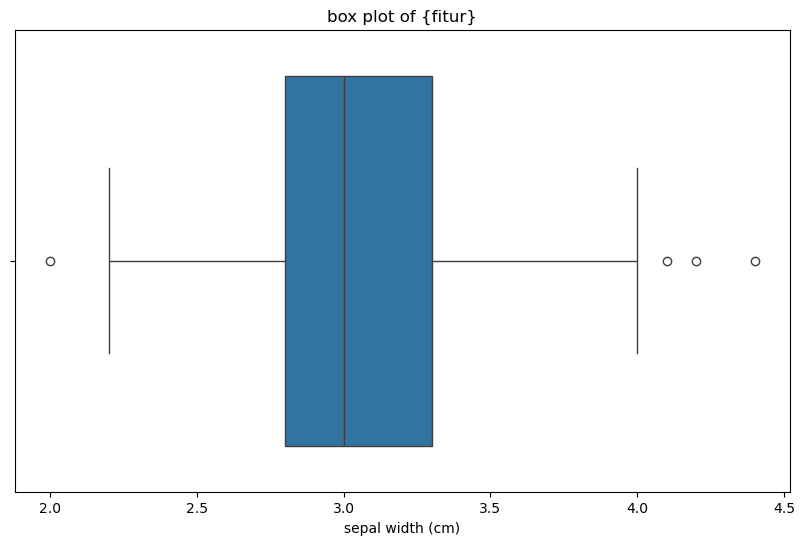

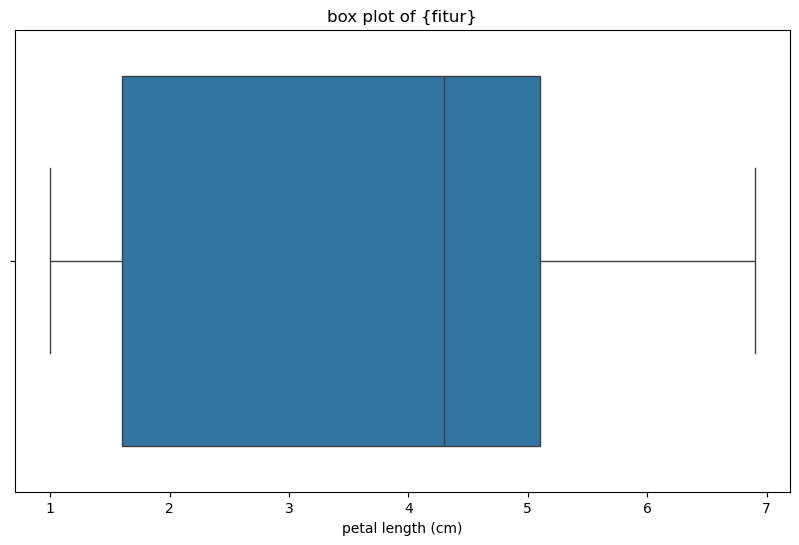

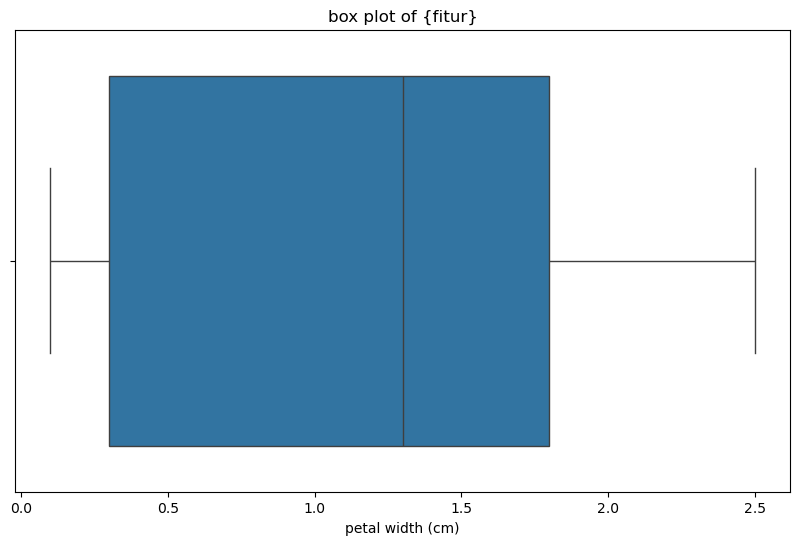

In [347]:
for fitur in Numeric_featurs:
  plt.figure(figsize=(10,6))
  sns.boxplot(data=DataFrame,x=fitur)
  plt.title('box plot of {fitur}')
  plt.show()

In [ ]:
tg_categorical = {
  0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'
}
DataFrame['target_categorical'] = DataFrame['target'].map(tg_categorical)

In [349]:
DataFrame.groupby('target_categorical')['sepal length (cm)'].agg(['min','max','mean'])

,min,max,mean
target_categorical,,,
Iris-setosa,4.3,5.8,5.006000
Iris-versicolor,4.9,7.0,5.936000
Iris-virginica,4.9,7.9,6.604082


In [350]:
DataFrame.groupby('target_categorical')['sepal width (cm)'].agg(['min','max','mean'])

,min,max,mean
target_categorical,,,
Iris-setosa,2.3,4.4,3.428000
Iris-versicolor,2.0,3.4,2.770000
Iris-virginica,2.2,3.8,2.979592


In [351]:
DataFrame.groupby('target_categorical')['petal length (cm)'].agg(['min','max','mean'])

,min,max,mean
target_categorical,,,
Iris-setosa,1.0,1.9,1.462000
Iris-versicolor,3.0,5.1,4.260000
Iris-virginica,4.5,6.9,5.561224


In [352]:
DataFrame.groupby('target_categorical')['petal width (cm)'].agg(['min','max','mean'])

,min,max,mean
target_categorical,,,
Iris-setosa,0.1,0.6,0.246000
Iris-versicolor,1.0,1.8,1.326000
Iris-virginica,1.4,2.5,2.028571


In [353]:
DataFrame = DataFrame.drop(columns=['target_categorical'],axis=1)

In [354]:
scaler = StandardScaler()
DataFrame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] = scaler.fit_transform(DataFrame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

In [355]:
DataFrame.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
123,0.551140,-0.827206,0.653295,0.796477,2
138,0.188846,-0.137353,0.596536,0.796477,2
53,-0.414976,-1.747009,0.142468,0.138633,1
30,-1.260327,0.092598,-1.219738,-1.308624,0
28,-0.777269,0.782450,-1.333255,-1.308624,0
50,1.396491,0.322549,0.539778,0.270202,1
47,-1.501855,0.322549,-1.333255,-1.308624,0
48,-0.656505,1.472303,-1.276496,-1.308624,0
38,-1.743384,-0.137353,-1.390014,-1.308624,0
35,-1.018798,0.322549,-1.446772,-1.308624,0


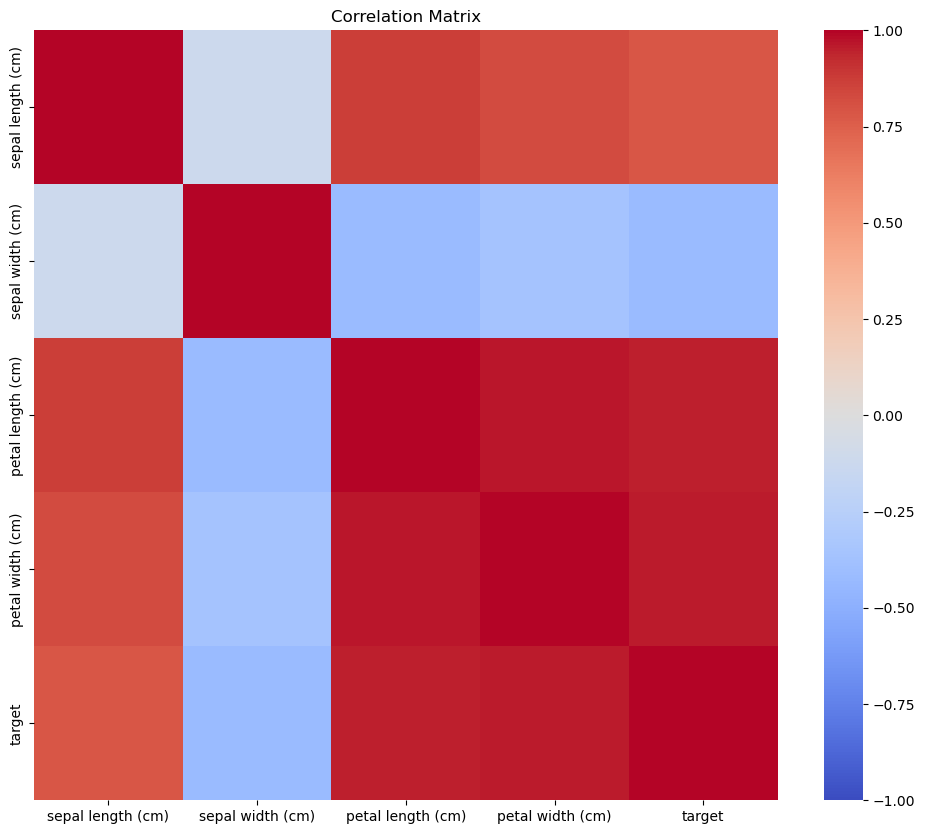

In [356]:
plt.figure(figsize=(12, 10))
correlation_matrix = DataFrame.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

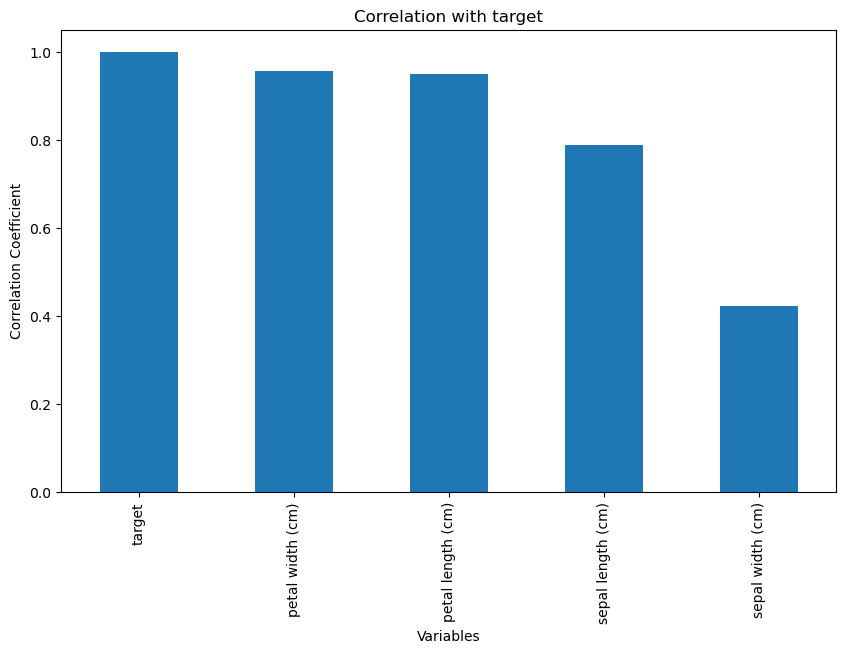

In [357]:
target_corr = DataFrame.corr()['target']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with target')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

In [358]:
x = DataFrame.drop(columns=['target'])
y = DataFrame['target']

In [359]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [360]:
print("Jumlah data: ",len(x))
print("Jumlah data latih: ",len(x_train))
print("Jumlah data test: ",len(x_test))

Jumlah data:  149
Jumlah data latih:  119
Jumlah data test:  30


In [363]:
logistic = LogisticRegression().fit(x_train,y_train)
KNN = KNeighborsClassifier().fit(x_train,y_train)

==== Logistic regresion ====
Confusion Matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  1  6]]
Accuracy: 0.9333
Precision: 0.9267
Recall: 0.9267
F1-Score: 0.9267

----------------------------------------



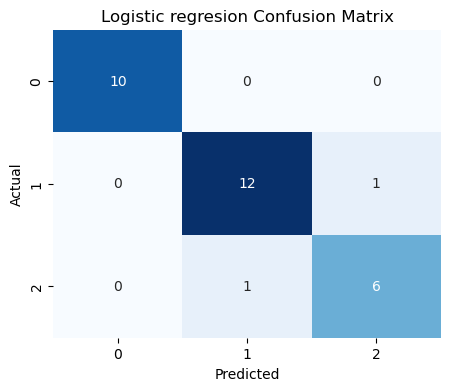

In [362]:
y_pred_lg = logistic.predict(x_test)
cm_lg = confusion_matrix(y_test, y_pred_lg)
print("==== Logistic regresion ====")
print("Confusion Matrix:")
print(cm_lg)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lg, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lg, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lg, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic regresion Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== KNN Classifier ====
Confusion Matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  1  6]]
Accuracy: 0.9333
Precision: 0.9267
Recall: 0.9267
F1-Score: 0.9267

----------------------------------------



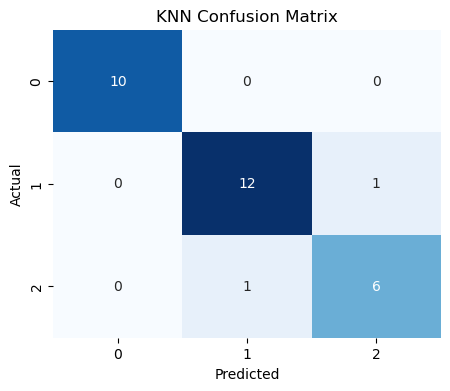

In [365]:
y_pred_knn = KNN.predict(x_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()